 # conneted components in graph
 - Connected component in an undirected graph refers to a group of vertices that are connected to each other through edges, but not connected to other vertices outside the group

- Input: V = 5, edges[][] = [[0, 1], [2, 1], [3, 4]]
 - Output: [[0, 1, 2], [3, 4]]
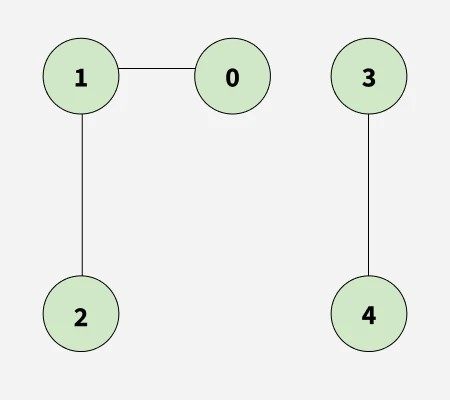

# with help of DFS and Disjoint set  we can find out the connected components of the graph 


- Create an adjacency list from the edge list.
- Initialize a visited array and mark every node as unvisited initially.
- Start from any unvisited node and perform a DFS. All nodes reachable from this node will belong to the same connected component.
- Iterate over all nodes, and for each unvisited node, perform a DFS and store the result.

In [ ]:
def buildGraph(n, edges):
    
    adj = [[] for _ in range(V)]

    # Populate the adjacency list from the edge list
    for edge in edges:
        u, v = edge[0], edge[1]

        # Add both directions since the graph is undirected
        adj[u].append(v)
        adj[v].append(u)

    return adj

def dfs(node, adj, vis, component):
    
    # Mark the current node as visited
    vis[node] = True

    # Add the node to the current component
    component.append(node)

    # Traverse all unvisited neighbors
    for neighbor in adj[node]:
        if not vis[neighbor]:
            dfs(neighbor, adj, vis, component)

def getComponents(V, edges):
    
    # Create the graph using the adjacency list
    adj = buildGraph(V, edges)

    # Initialize a visited array to keep track of visited nodes
    vis = [False] * V

    # This will store all the connected components
    res = []

    # Iterate through all nodes
    for i in range(V):
        
        # If the node has not been visited, it's a new component
        if not vis[i]:
            component = []

            # Perform DFS to collect all nodes in this component
            dfs(i, adj, vis, component)

            # Add the component to the result list
            res.append(component)

    return res

if __name__ == "__main__":
    
    # Number of nodes in the graph
    V = 5

    # Edge list representing the undirected graph as 2D array
    edges = [
        [0, 1],
        [1, 2],
        [3, 4]
    ]

    # Get all connected components using the countComponents function
    res = getComponents(V, edges)

    # Print each connected component
    for comp in res:
        print(" ".join(map(str, comp)))

- Time Complexity: O(V + E) where V is the number of vertices and E is the number of edges.
- Auxiliary Space: O(V + E)
## Using Disjoint Set Union (DSU):
- The idea to solve the problem using DSU (Disjoint Set Union) is to initially declare all the nodes as individual subsets and then visit them. When a new unvisited node is encountered, unite it with the underlying subset. In this manner, a single component will be visited in each traversal

- Declare an array arr[] of size V, where V is the total number of nodes in the graph.
- The value at each index i of the array represents the parent of the node i.
- At the beginning, each node is its own parent. This is the base state where each node is considered an individual subset.
- Perform Union Operation:
    - When nodes are united, change the parent of one node to the other, ensuring that the sets are merged properly.
    - Each time two nodes are united, their parents are updated accordingly to reflect the new structure of the set.
- Traverse the Nodes:
    - Go  through each node from 0 to V-1.
    - If a node is its own parent (i.e., it is a representative of a set), perform the DSU (find and union) operation starting from that node.
- Store the result of every component and return it.



    -- Time Complexity: O(V+E)
    -- Auxiliary Space: O(V)

In [ ]:
# Function to find the root parent of a node with path compression
def findParent(parent, x):
    if parent[x] == x:
        return x
        
    # Path compression
    parent[x] = findParent(parent, parent[x])  
    return parent[x]

# Function to unite two subsets
def unionSets(parent, x, y):
    px = findParent(parent, x)
    py = findParent(parent, y)
    if px != py:
        
        # Union operation
        parent[px] = py  

def getComponents(V, edges):
    
    # Initialize each node as its own parent
    parent = [i for i in range(V)]

    # Union sets using the edge list
    for edge in edges:
        unionSets(parent, edge[0], edge[1])

    # Apply path compression for all nodes
    for i in range(V):
        parent[i] = findParent(parent, i)

    # Group nodes by their root parent
    resMap = {}
    for i in range(V):
        root = parent[i]
        if root not in resMap:
            resMap[root] = []
        resMap[root].append(i)

    # Collect all components into a result list
    res = list(resMap.values())

    return res

if __name__ == "__main__":
    V = 5

    # Edge list as 2D array (list of lists)
    edges = [
        [0, 1],
        [1, 2],
        [3, 4]
    ]

    # Find connected components using DSU
    res = getComponents(V, edges)

    # Print connected components
    for comp in res:
        print(" ".join(map(str, comp)))